## Deep Learning: 

<pre>
1. ImageDataGenerator
2. Pipeline using tf.data
</pre>

<pre>
As discussed in Previous notebooks, to train NN efficiently with less train time, we have to write better data pipelines. 
For Images, Keras is giving ImageDataGenerator to get images to RAM/GPU in batches. 
But you can write your own pipelines with tf.data API.  
</pre>

Download the data from <a href='https://www.kaggle.com/prasunroy/natural-images'>here</a>

<pre>
<b>ImageDataGenerator</b>
</pre>

In [1]:
import tensorflow as tf
import os
import numpy as np
import pandas as pd

In [2]:
import IPython.display as display

In [3]:
tf.__version__

'2.0.0'

In [4]:
dir_path = "natural_images"

In [5]:
os.listdir(dir_path)

['airplane', 'car', 'cat', 'dog', 'flower', 'fruit', 'motorbike', 'person']

In [6]:
for folder in os.listdir(dir_path):
    print('{:10s}: {} images'.format(folder, len(os.listdir(os.path.join(dir_path, folder)))))

airplane  : 727 images
car       : 968 images
cat       : 885 images
dog       : 702 images
flower    : 843 images
fruit     : 1000 images
motorbike : 788 images
person    : 986 images


In [7]:
#import openCV
import cv2

In [8]:
##Getting size of images
list_of_heights = []
list_of_widths = []
for folder in os.listdir(dir_path):
    for image in os.listdir(os.path.join(dir_path,folder)):
        img = cv2.imread(os.path.join(os.path.join(dir_path,folder),image), cv2.IMREAD_UNCHANGED)
        # get dimensions of image
        shape = img.shape
        list_of_heights.append(shape[0])
        list_of_widths.append(shape[1])     

Text(0.5, 1.0, 'heights')

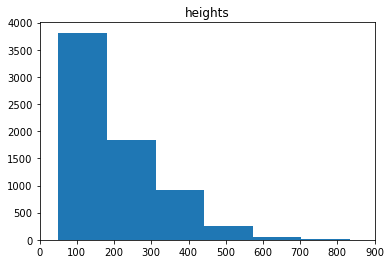

In [9]:
##plotting 
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(list_of_heights,bins=20)
plt.xlim(0,900)
plt.title('heights')

(0, 900)

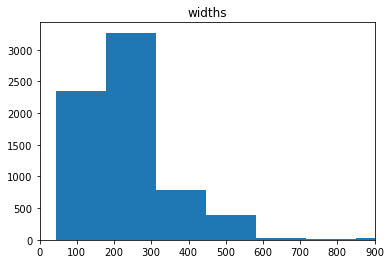

In [10]:
plt.hist(list_of_widths,bins=20)
plt.title('widths')
plt.xlim(0,900)

In [11]:
np.median(list_of_heights), np.median(list_of_widths)

(122.0, 231.0)

In [12]:
np.mean(list_of_heights), np.mean(list_of_widths)

(198.1923467169155, 234.86911146542977)

In [13]:
import IPython.display as display
from PIL import Image
import pathlib

- See some images of the car category

In [14]:
os.path.join(os.getcwd(), dir_path)

'E:\\AAIC\\transfer_learning\\natural_images'

In [15]:
data_dir = pathlib.Path(dir_path)
data_dir

WindowsPath('natural_images')

In [109]:
CLASS_NAMES = np.array([x.name for x in data_dir.iterdir() if x.is_dir()])
CLASS_NAMES

array(['airplane', 'car', 'cat', 'dog', 'flower', 'fruit', 'motorbike',
       'person'], dtype='<U9')

In [110]:
labels_to_idx = {value: index for index, value in enumerate(CLASS_NAMES)}
labels_to_idx

{'airplane': 0,
 'car': 1,
 'cat': 2,
 'dog': 3,
 'flower': 4,
 'fruit': 5,
 'motorbike': 6,
 'person': 7}

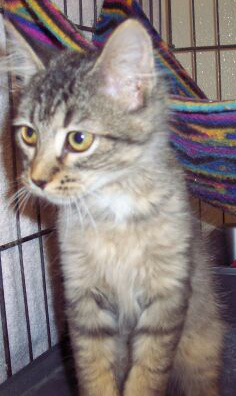

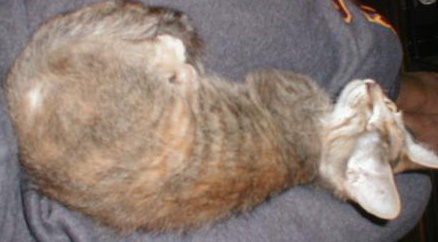

In [18]:
cats = data_dir.glob('*/cat_*.jpg')
for i in range(2):
    display.display(Image.open(next(cats)))

## Load using keras.preprocessing

In [506]:
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [507]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

6899

In [508]:
BATCH_SIZE = 32
IMG_HEIGHT = 224
IMG_WIDTH = 224

STEPS_PER_EPOCH = np.ceil(image_count/BATCH_SIZE)

In [509]:
train_data_generator = image_generator.flow_from_directory(
    directory=str(data_dir),  target_size=(IMG_HEIGHT, IMG_WIDTH), color_mode='rgb',
    batch_size=BATCH_SIZE, shuffle=True, seed=25, classes=list(CLASS_NAMES))

Found 6899 images belonging to 8 classes.


In [510]:
train_data_generator.class_indices

{'airplane': 0,
 'car': 1,
 'cat': 2,
 'dog': 3,
 'flower': 4,
 'fruit': 5,
 'motorbike': 6,
 'person': 7}

### Inspecting few images from batch

In [511]:
image_batch, label_batch = next(train_data_generator)
image_batch.shape, label_batch.shape

((32, 224, 224, 3), (32, 8))

In [512]:
train_data_generator.class_indices

{'airplane': 0,
 'car': 1,
 'cat': 2,
 'dog': 3,
 'flower': 4,
 'fruit': 5,
 'motorbike': 6,
 'person': 7}

In [513]:
idx_to_labels = {value:key for (key, value) in train_data_generator.class_indices.items()}

In [514]:
idx_to_labels

{0: 'airplane',
 1: 'car',
 2: 'cat',
 3: 'dog',
 4: 'flower',
 5: 'fruit',
 6: 'motorbike',
 7: 'person'}

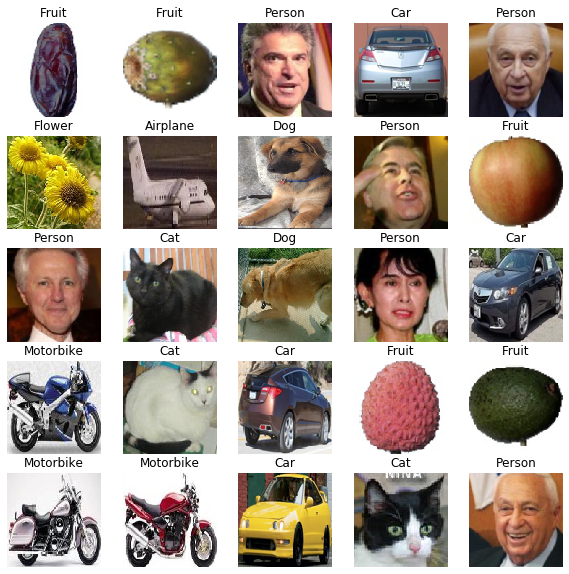

In [515]:
plt.figure(figsize=(10, 10))
for i in range(25):
    ax = plt.subplot(5,5, i+1)
    plt.imshow(image_batch[i])
    plt.title(CLASS_NAMES[label_batch[i]==1][0].title())
    plt.axis('off')

## Load using tf.data

In [517]:
data_dir

WindowsPath('natural_images')

In [518]:
list_ds = tf.data.Dataset.list_files(file_pattern=str(data_dir/'*/*.jpg'), seed=25)

In [519]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

6899

In [521]:
BATCH_SIZE = 32
IMG_HEIGHT = 156
IMG_WIDTH = 256

STEPS_PER_EPOCH = np.ceil(image_count/BATCH_SIZE)
STEPS_PER_EPOCH

216.0

In [520]:
for f in list_ds.take(5):
    print(f.numpy().decode())

natural_images\fruit\fruit_0065.jpg
natural_images\motorbike\motorbike_0583.jpg
natural_images\person\person_0235.jpg
natural_images\fruit\fruit_0639.jpg
natural_images\cat\cat_0764.jpg


### Utility funcions to load the data

In [523]:
def get_label(file_path):
    # convert the path to a list of path components
    parts = tf.strings.split(file_path, os.path.sep)
    # The second to last is the class-directory
    return parts[-2]==CLASS_NAMES

p = get_label('natural_images\dog\dog_0228.jpg')
p

<tf.Tensor: id=4495, shape=(8,), dtype=bool, numpy=array([False, False, False,  True, False, False, False, False])>

In [525]:
def decode_img(img):
    # convert the string image to 3D uint8 tensor
    img = tf.image.decode_jpeg(contents=img, channels=3)
    # convert that imgage to float32
    img = tf.image.convert_image_dtype(image=img, dtype=tf.float32)
    
    return tf.image.resize(images=img, size=[IMG_HEIGHT, IMG_WIDTH])

In [526]:
def process_path(file_path):
    # get label from the file path
    label=get_label(file_path)
    
    # read the image from file as raw string
    img = tf.io.read_file(filename=file_path)
    
    # dococde and return the image and label
    return decode_img(img), label
    

In [527]:
# map : Map function to process each file name to image, label pairs
# AUTOTUNE :
labeled_ds = list_ds.map(map_func=process_path,
                         num_parallel_calls=tf.data.experimental.AUTOTUNE)

In [528]:
for image, label in labeled_ds.take(1):
    print("Image Shape: ", image.shape)
    print("label : ", label.numpy())

Image Shape:  (156, 256, 3)
label :  [False False False False False False  True False]


In [529]:
def prepare_for_training(ds, cache=True, shuffle_buffer=1000, BATCH_SIZE=32):
    if cache:
        if isinstance(cache, str):
            ds = ds.cache(cache)  # storing the cache in the disk
        else:
            ds = ds.cache()  # store everything in memory
    
    # repeat the dataset forever
    ds = ds.repeat()
    ds = ds.batch(BATCH_SIZE)

    ds = ds.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
    
    return ds

In [530]:
train_ds = prepare_for_training(ds=labeled_ds, cache='./naturalimages.tfcache',
                                BATCH_SIZE=BATCH_SIZE)

In [536]:
train_batch, label_batch = next(iter(train_ds))

In [537]:
train_batch.shape, label_batch.shape

(TensorShape([32, 156, 256, 3]), TensorShape([32, 8]))

In [563]:
CLASS_NAMES

array(['airplane', 'car', 'cat', 'dog', 'flower', 'fruit', 'motorbike',
       'person'], dtype='<U9')

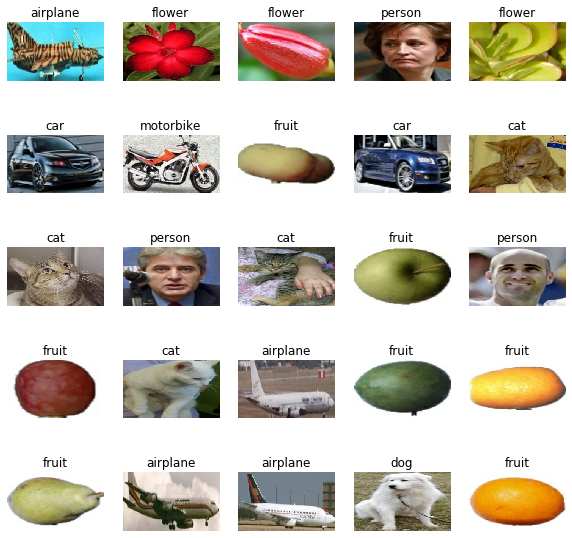

In [579]:
plt.figure(figsize=(10,10))
for i in range(25):
    ax = plt.subplot(5,5, i+1)
    plt.imshow(train_batch[i])
    plt.title(CLASS_NAMES[label_batch[i].numpy()==1][0])
    plt.axis('off')
    
plt.show()

In [584]:
STEPS_PER_EPOCH

216.0

In [588]:
import time
default_timeit_steps = 100

def timeit(ds, steps=default_timeit_steps):
  start = time.time()
  it = iter(ds)
  for i in range(steps):
    batch = next(it)
    if i%10 == 0:
      print(i,end='\r')
  print()
  end = time.time()

  duration = end-start
  print("{} batches: {} s".format(steps, duration))
  print("{:0.5f} Images/s".format(BATCH_SIZE*steps/duration))

In [589]:
# `keras.preprocessing`
timeit(train_data_generator)

90
100 batches: 23.1533944606781 s
138.20868 Images/s


In [590]:
# `tf.data`
timeit(train_ds)

90
100 batches: 9.751290321350098 s
328.16170 Images/s


In [591]:
# `tf.data`
timeit(train_ds)

90
100 batches: 10.501254320144653 s
304.72550 Images/s


 ===========================================================

In [599]:
#importing tensorflow
from tensorflow.keras.layers import Dense,Input,Conv2D,MaxPool2D,Activation,Dropout,Flatten
from tensorflow.keras.models import Model
import random as rn

<pre>
<b>Data Pipelines with TensorFlow</b>
</pre>

In [600]:
##getting all the directories
list(data_dir.iterdir())

[WindowsPath('natural_images/airplane'),
 WindowsPath('natural_images/car'),
 WindowsPath('natural_images/cat'),
 WindowsPath('natural_images/dog'),
 WindowsPath('natural_images/flower'),
 WindowsPath('natural_images/fruit'),
 WindowsPath('natural_images/motorbike'),
 WindowsPath('natural_images/person')]

In [602]:
##Getting all image paths
import random
all_image_paths = list(data_dir.glob('*/*'))
all_image_paths = [str(path) for path in all_image_paths]
# ##shuffling the images 
# random.shuffle(all_image_paths)

image_count = len(all_image_paths)
image_count

6899

In [603]:
CLASS_NAMES

array(['airplane', 'car', 'cat', 'dog', 'flower', 'fruit', 'motorbike',
       'person'], dtype='<U9')

In [605]:
#List the available labels
label_names = sorted(item.name for item in data_dir.glob('*/') if item.is_dir())
label_names

['airplane', 'car', 'cat', 'dog', 'flower', 'fruit', 'motorbike', 'person']

In [606]:
#Assign an index to each label
label_to_index = dict((name, index) for index,name in enumerate(label_names))
label_to_index

{'airplane': 0,
 'car': 1,
 'cat': 2,
 'dog': 3,
 'flower': 4,
 'fruit': 5,
 'motorbike': 6,
 'person': 7}

In [607]:
#Create a list of every file, and its label index
all_image_labels = [label_to_index[pathlib.Path(path).parent.name]
                    for path in all_image_paths]

In [ ]:
tf.keras.losses.CategoricalCrossentropy()

In [ ]:
def tfdata_generator(images, labels, is_training, batch_size=32):
    '''Construct a data generator using tf.Dataset'''
    
    def parse_function(filename, label):
        #reading path 
        image_string = tf.io.read_file(filename)
        #decoding image
        image = tf.image.decode_jpeg(image_string, channels=3)

        # This will convert to float values in [0, 1]
        image = tf.image.convert_image_dtype(image, tf.float32)
        #resize the image
        image = tf.image.resize(image, [156, 256])
        #one hot coding for label
        y = tf.one_hot(tf.cast(label, tf.uint8), 8)
        return image, y
    
    ##creating a dataset from tensorslices
    dataset = tf.data.Dataset.from_tensor_slices((images, labels))
    
    if is_training:
        dataset = dataset.shuffle(5000)  # depends on sample size

    # Transform and batch data at the same time
    dataset = dataset.apply(tf.data.experimental.map_and_batch( parse_function, batch_size,num_parallel_batches=4,  # cpu cores
        drop_remainder=True if is_training else False))
    
    #repeat the dataset indefinitely
    dataset = dataset.repeat()

    
    #prefetch the data into CPU/GPU
    dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)

    return dataset

Please go through this <a href="https://stackoverflow.com/questions/53514495/what-does-batch-repeat-and-shuffle-do-with-tensorflow-dataset">link</a> to see how shuffle,repeat, batch going to work with example.

In [ ]:
#creating a generator
tf_image_generator = tfdata_generator(all_image_paths, all_image_labels, is_training=True, batch_size=32)

Instructions for updating:
Use `tf.data.Dataset.map(map_func, num_parallel_calls)` followed by `tf.data.Dataset.batch(batch_size, drop_remainder)`. Static tf.data optimizations will take care of using the fused implementation.


In [ ]:
tf_image_generator

<PrefetchDataset shapes: ((32, 156, 256, 3), (32, 8)), types: (tf.float32, tf.float32)>

In [ ]:
steps_per_epoch=np.ceil(len(all_image_paths)/32)
steps_per_epoch

216.0

In [ ]:
##Time taken to load the images
import time
t = 0
start = time.time()
for x, y in tf_image_generator.take(216):
    pass
end = time.time()
duration = end-start
print("{} batches: {} s".format(216, duration))
print("{:0.5f} Images/s".format(32*216/duration))

216 batches: 10.307826042175293 s
670.55846 Images/s


In [ ]:
import os
os.environ['PYTHONHASHSEED'] = '0'

##https://keras.io/getting-started/faq/#how-can-i-obtain-reproducible-results-using-keras-during-development
## Have to clear the session. If you are not clearing, Graph will create again and again and graph size will increses. 
## Varibles will also set to some value from before session
tf.keras.backend.clear_session()

## Set the random seed values to regenerate the model.
np.random.seed(0)
rn.seed(0)

#Input layer
input_layer = Input(shape=(156,256,3),name='Input_Layer')

#Conv Layer
Conv1 = Conv2D(filters=32,kernel_size=(3,3),strides=(1,1),padding='valid',data_format='channels_last',
              activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed=0),name='Conv1')(input_layer)
#MaxPool Layer
Pool1 = MaxPool2D(pool_size=(2,2),strides=(2,2),padding='valid',data_format='channels_last',name='Pool1')(Conv1)


Conv2 = Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),padding='valid',data_format='channels_last',
              activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed=3),name='Conv2')(Pool1)
Conv3 = Conv2D(filters=64,kernel_size=(3,3),strides=(2,2),padding='valid',data_format='channels_last',
              activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed=5),name='Conv3')(Conv2)
#MaxPool Layer
Pool2 = MaxPool2D(pool_size=(2,2),strides=(1,1),padding='valid',data_format='channels_last',name='Pool2')(Conv3)


Conv4 = Conv2D(filters=128,kernel_size=(3,3),strides=(2,2),padding='valid',data_format='channels_last',
              activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed=9),name='Conv4')(Pool2)
#MaxPool Layer
Pool3 = MaxPool2D(pool_size=(2,2),strides=(2,2),padding='valid',data_format='channels_last',name='Pool3')(Conv4)



#Flatten
flatten = Flatten(data_format='channels_last',name='Flatten')(Pool3)

#FC layer
FC1 = Dense(units=30,activation='relu',kernel_initializer=tf.keras.initializers.glorot_normal(seed=32),name='FC1')(flatten)

#FC layer
FC2 = Dense(units=15,activation='relu',kernel_initializer=tf.keras.initializers.glorot_normal(seed=33),name='FC2')(FC1)

#output layer
Out = Dense(units=8,activation='softmax',kernel_initializer=tf.keras.initializers.glorot_normal(seed=3),name='Output')(FC2)

#Creating a model
model = Model(inputs=input_layer,outputs=Out)

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.01),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
tf_image_generator = tfdata_generator(all_image_paths, all_image_labels, is_training=True, batch_size=32)

In [ ]:
model.fit_generator(tf_image_generator,steps_per_epoch=216,epochs=3)

Train for 216 steps
Epoch 1/3
 13/216 [>.............................] - ETA: 3:42 - loss: 11.4011 - accuracy: 0.1484

KeyboardInterrupt: 

<pre>
1. The order is important.

  - A <b>shuffle</b> after a <b>repeat</b> would shuffle items across epoch boundaries 
  (some items will be seen twice before others are seen at all).
  - A <b>shuffle</b> after a <b>batch</b> would shuffle the order of the batches, 
  but not shuffle the items across batches.

2. We use a <b>buffer_size</b> the same size as the dataset for a full shuffle. 
Up to the dataset size, large values provide better randomization, but use more memory.

3. The shuffle buffer is filled before any elements are pulled from it. 
So a large <b>buffer_size</b> may cause a delay when your Dataset is starting.

</pre>

<pre>
<b> using Cache</b>
</pre>

In [ ]:
def tfdata_generator(images, labels, is_training, batch_size=32):
    '''Construct a data generator using tf.Dataset'''
    
    def parse_function(filename, label):
        #reading path 
        image_string = tf.io.read_file(filename)
        #decoding image
        image = tf.image.decode_jpeg(image_string, channels=3)

        # This will convert to float values in [0, 1]
        image = tf.image.convert_image_dtype(image, tf.float32)
        
        image = tf.image.resize(image, [156, 256])
        
        y = tf.one_hot(tf.cast(label, tf.uint8), 8)
        return image, y

    dataset = tf.data.Dataset.from_tensor_slices((images, labels))

    # Transform and batch data at the same time
    dataset = dataset.map(parse_function,num_parallel_calls=4)
    
    dataset = dataset.cache('./tf-data')
    
    dataset = dataset.apply(tf.data.experimental.shuffle_and_repeat(buffer_size=1000))
    dataset = dataset.batch(32).prefetch(tf.data.experimental.AUTOTUNE)
    return dataset

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
tf_image_generator = tfdata_generator(all_image_paths, all_image_labels, is_training=True, batch_size=32)

Instructions for updating:
Use `tf.data.Dataset.shuffle(buffer_size, seed)` followed by `tf.data.Dataset.repeat(count)`. Static tf.data optimizations will take care of using the fused implementation.


<pre>
<b>Image augmentation</b>
</pre>

In [ ]:
def tfdata_generator(images, labels, is_training, batch_size=32):
    '''Construct a data generator using tf.Dataset'''
    
    def parse_function(filename,labels):
        #reading path 
        image_string = tf.io.read_file(filename)
        #decoding image
        image = tf.image.decode_jpeg(image_string, channels=3)

        # This will convert to float values in [0, 1]
        image = tf.image.convert_image_dtype(image, tf.float32)
        
        image = tf.image.resize(image, [156, 256])
        
        y = tf.one_hot(tf.cast(labels, tf.uint8), 8)
        return image,y
    
    def flip(image,labels):
        
        image = tf.image.random_flip_left_right(image)
        image = tf.image.random_flip_up_down(image)
        
        return image,labels
    
    def rotate(image,labels):

        return tf.image.rot90(image, tf.random.uniform(shape=[], minval=0, maxval=4, dtype=tf.int32)),labels
    
    def color(image,labels):
        image = tf.image.random_hue(image, 0.08)
        image = tf.image.random_saturation(image, 0.6, 1.6)
        image = tf.image.random_brightness(image, 0.05)
        image = tf.image.random_contrast(image, 0.7, 1.3)
        return image,labels
    
    dataset = tf.data.Dataset.from_tensor_slices((images,labels))
    
    if is_training:
        dataset = dataset.shuffle(5000)  # depends on sample size
        
    # Transform and batch data at the same time
    dataset = dataset.map(parse_function, num_parallel_calls=4)
    
    augmentations = [flip,rotate,color]
    
    if is_training:   
      for f in augmentations:
        if np.random.uniform(0,1)>0.6:
            dataset = dataset.map(f,num_parallel_calls=4)
    
    dataset = dataset.repeat()
    
    dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)
    return dataset

<pre>
Check <a href='https://androidkt.com/tensorflow-image-augmentation-using-tf-image/'>this</a> link for Image Augmentation tech in Tensorflow.

In [ ]:
tf.keras.backend.clear_session()
tf_image_generator = tfdata_generator(all_image_paths, all_image_labels, is_training=True, batch_size=1)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(156, 256, 3)


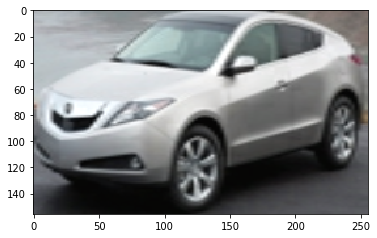

In [ ]:
for x, y in tf_image_generator:
    print(x.shape)
    plt.imshow(x)
    break